<h1> Исследование данных о продажах игр </h1>

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, *Xbox* или *PlayStation*)

**Цель исследования:**
1. Изучить влияние различных факторов на продажи
2. Выявить определяющие успешность игры закономерности

**Ход исследования:**

Данные о продажах игр получу из файла `/datasets/games.csv`. Изучу общую информацию о датафрейме.

Первым делом упрощу названия столбцов и приведу их к стилю snake_case. Заменю тип данных столбцов, где это будет необходимо. Изучу и обработаю пропущенные значения и дубликаты. В итоге я смогу приступить к исследовательскому анализу и выявить зависимости и особенности данных.

**Таким образом, моё исследование пройдёт 5 этапов:**

1. [Загрузка и обзор данных](#Загрузка-данных)
2. [Предобработка данных](#Предобработка-данных)
3. [Исследовательский анализ](#Исследовательский-анализ)
4. [Составление портрета пользователя каждого региона](#Портрет)
5. [Проверка гипотез](#Гипотезы)
6. [Общий вывод](#Вывод)

<a id='Загрузка-данных'></a>

<h2> Загрузка данных <a id='загрузка_данных'></a>

Импортируем необходимые библиотеки для будущей работы. Считаем данные из csv-файла в переменную `df` и изучим их.

Путь к файлу: `/datasets/games.csv`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
try:
    df = pd.read_csv('C:\jupyter projects\games.csv')
    sns.set_style("darkgrid")
except:
    df = pd.read_csv('/datasets/games.csv')
    sns.set_style("darkgrid")

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


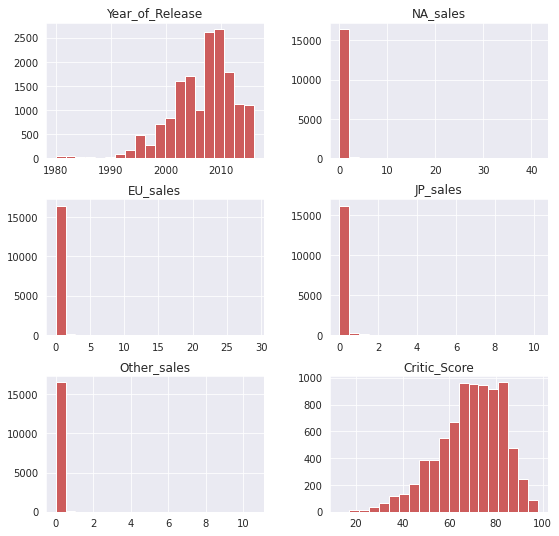

In [3]:
display(df.head())
display(df.tail())
display(df.describe())
df.info()
df.hist(figsize=(9,9), bins=20, color='indianred');

**Вывод**

Взглянув на общие сведения о данных можно отметить, что:
- названия столбцов не приведены к нижнему регистру 
- в датасете много пропущенных значений
- отрицательных значений в датасете нет
- некоторые типы данных стоит изменить

<a id='Предобработка-данных'></a>

<h2> Предобработка данных

<h3> Названия столбцов

Изменим названия столбцов и приведём их к нижнему регистру.

In [4]:
df.rename(columns={
    'Year_of_Release':'year', 
    'NA_sales':'na', 
    'EU_sales':'eu', 
    'JP_sales':'jp', 
    'Other_sales':'other'
     },
          inplace=True)
df.columns = map(str.lower, df.columns)

In [5]:
df.columns

Index(['name', 'platform', 'year', 'genre', 'na', 'eu', 'jp', 'other',
       'critic_score', 'user_score', 'rating'],
      dtype='object')

<h3> Типы данных

Посмотрим на уникальные значения `critic_score` и `user_score`. Решим, какие типы данных нужно изменить.

In [6]:
display(df['critic_score'].unique())
display(df['user_score'].unique())

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце `critic_score` значения - целые числа, поэтому изменим тип данных на `int`. 

В столбце `user_score` значения с плавающей точкой, изменим тип данных на `float`. Обратим внимание, что в `user_score` присутствует значение `tbd` - это аббревиатура, обозначающая «To Be Determined» (англ. «будет определено»). Или отзывов было очень мало для рейтинга, или не было вообще. Заменим это значение на `NaN`.

Также изменим тип данных столбца `year` на `int`.

In [7]:
df[['year', 'critic_score']] = df[['year', 'critic_score']].astype('Int64')

df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
df['user_score'] = df['user_score'].astype('float')

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 Верно, `tbd` означает `To Be Determined`, т.к. игра ещё не выпущена. Тут можно заменить заглушкой, а можно привести в nan
</div>

In [8]:
display(df['critic_score'].unique())
display(df['user_score'].unique())
df.info()
display(df.head());

<IntegerArray>
[  76, <NA>,   82,   80,   89,   58,   87,   91,   61,   97,   95,   77,   88,
   83,   94,   93,   85,   86,   98,   96,   90,   84,   73,   74,   78,   92,
   71,   72,   68,   62,   49,   67,   81,   66,   56,   79,   70,   59,   64,
   75,   60,   63,   69,   50,   25,   42,   44,   55,   48,   57,   29,   47,
   65,   54,   20,   53,   37,   38,   33,   52,   30,   32,   43,   45,   51,
   40,   46,   39,   34,   35,   41,   36,   28,   31,   27,   26,   19,   23,
   24,   21,   17,   22,   13]
Length: 83, dtype: Int64

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16715 non-null  object 
 2   year          16446 non-null  Int64  
 3   genre         16713 non-null  object 
 4   na            16715 non-null  float64
 5   eu            16715 non-null  float64
 6   jp            16715 non-null  float64
 7   other         16715 non-null  float64
 8   critic_score  8137 non-null   Int64  
 9   user_score    7590 non-null   float64
 10  rating        9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN


<h3> Пропущенные значения

Мы знаем, что в датафрейме имеются пропуски. Используем метод `isna().sum()` чтобы узнать количество пропущенных значений в каждом столбце. Также рассчитаем и посмотрим долю пропусков, чтобы оценить масштаб и решить, как поступить с пропущенными значениями.

In [9]:
display(df.isna().sum())
pd.DataFrame(round(df.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('Set3')

name               2
platform           0
year             269
genre              2
na                 0
eu                 0
jp                 0
other              0
critic_score    8578
user_score      9125
rating          6766
dtype: int64

,0
user_score,54.600000
critic_score,51.300000
rating,40.500000
year,1.600000
name,0.000000
genre,0.000000
platform,0.000000
na,0.000000
eu,0.000000
jp,0.000000


Огромная доля пропусков оказалась в столбцах `user_score` и `critic_score` - больше половины значений отсутствует. Также довольно много пропущенных данных в столбце `rating`. Пропуски в других столбцах незначительны, поэтому можем их удалить, так как они никак не повлияют на дальнейшее исследование.

Пропуски в столбцах `name`, `year`, `genre` и `rating` могли возникнуть вследствие того, что данные или забыли указать, или у игр не были утверждены/определены эти значения.

Пропуски в столбцах `critic_score` и `user_score` могли появиться из-за слишком малого количества отзывов на игру, а также игра могла быть "свежей" на момент составления датафрейма, поэтому критики и пользователи не успели её оценить.


Обработаем и удалим пропуски в столбцах, где их мало.

**name**

В столбце `name` всего две строки с пропусками. Взглянем на них.

In [10]:
df[df['name'].isnull()]

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


Почти в половине столбцов отсутствуют значения. Можем удалить эти строки, так как для будущего исследования они не пригодятся.

In [11]:
df.dropna(subset=['name'], inplace=True)

Проверим, сколько пропусков осталось.

In [12]:
df.isna().sum()

name               0
platform           0
year             269
genre              0
na                 0
eu                 0
jp                 0
other              0
critic_score    8576
user_score      9123
rating          6764
dtype: int64

**year_of_release**

Взглянем на строки, где пропущены значения `year`.

In [13]:
df[df['year'].isnull()]

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


Удалим эти строки.

In [14]:
df.dropna(subset=['year'], inplace=True)

Проверим результаты.

In [15]:
df['year'].isna().sum()

0

**critic_score, user_score, rating**

Ещё раз взглянем на пропущенные значения.

In [16]:
df.isna().sum()

name               0
platform           0
year               0
genre              0
na                 0
eu                 0
jp                 0
other              0
critic_score    8461
user_score      8981
rating          6676
dtype: int64

Больше всего данных отсутствует в `critic_score`, `user_score` и `rating`. Мы не можем заменить  столбцы с оценками средним или медианным значением, так как игры могли ещё попросту не оценить. Мы также не можем удалить их, в виду того, что такое большое количество данных может пригодиться для дальнейшего исследования. Однако можно заменить пропуски в рейтинге на `unclear`(англ.«непонятный»).

In [17]:
df['rating'] = df['rating'].fillna("unclear")

<h3>Дубликаты

Проверим датасет явные на дубликаты.

In [18]:
df.duplicated().sum()

0

Проверим датасет на неявные дубликаты.

In [19]:
df[df[['name', 'platform','year']].duplicated(keep=False)]

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,5.5,E


Мы нашли 2 дублирующиеся строки. Значения в них идентичны, за исключением данных с количеством продаж. 

Появление таких дубликатов могло случиться вследствие сбоев в системе при логировании, или же данные собирались из разных источников. Скорее всего, вторая строка была взята из данных по продажам в ЕС, так как в столбцах с продажами значение имеется только для Европы. 

Оставим строку, где имеются данные о продажах в каждом регионе, а от другой строки избавимся.

In [20]:
df.drop(labels=[16230],axis=0, inplace=True)
df[df[['name', 'platform','year']].duplicated(keep=False)]

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating


Проверим `genre` и `platform` на уникальные значения и дубликаты.

In [21]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [22]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Дубликатов нет.

<h3> Новые столбцы

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец `total_sales`.

In [23]:
total_sales = df['na'] + df['eu'] + df['jp'] + df['other']
df.insert(loc = 8,
          column = 'total_sales',
          value = total_sales)

In [24]:
df.head()

,name,platform,year,genre,na,eu,jp,other,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,<NA>,NaN,unclear
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,<NA>,NaN,unclear


<h3> Вывод

В ходе предобработки данных мы:
- Привели названия столбцов к стилю snake_case
- Изменили тип данных столбцов `year`, `ctitic_score` и `user_score`
- Обработали пропущенные значения(описали возможные причины их возникновения) - удалили и заполнили их по ситуации
- Обнаружили дублирующиеся строки, обработали их
- Добавили в таблицу новый столбец с суммарными продажами во всех регионах

<a id='Исследовательский-анализ'></a>

<h2> Исследовательский анализ данных

<h3>Важны ли данные за все периоды?

Посмотрим, сколько игр выпускалось в разные годы.

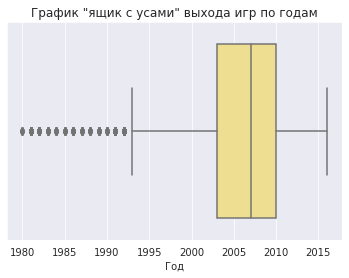

In [25]:
sns.boxplot(x=df['year'], color='#FCE883')
plt.title('График "ящик с усами" выхода игр по годам')
plt.xlabel('Год');

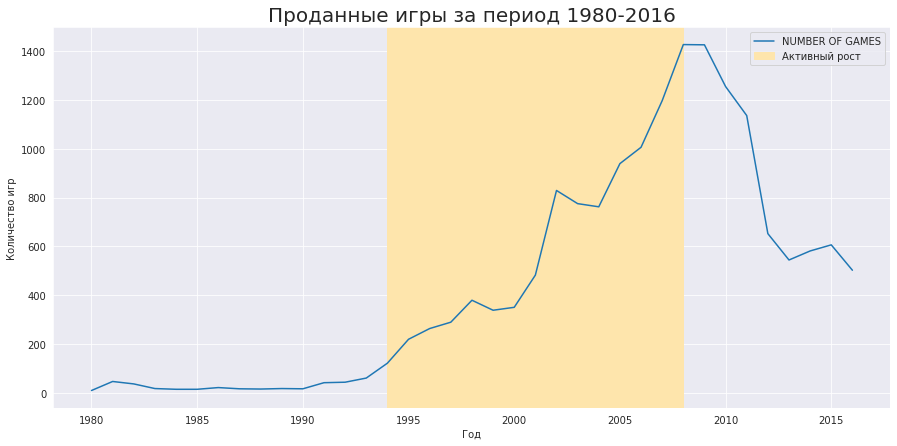

In [26]:
plt.figure(figsize=(15,7))
plt.title('Проданные игры за период 1980-2016', fontsize=20)
plt.ylabel('Количество игр')
plt.xlabel('Год')
plt.plot(df.groupby('year')['name'].count(), '-', label='NUMBER OF GAMES', alpha=1)
plt.axvspan(1994, 2008, color='#FEE5AC', label='Активный рост')
plt.grid(True)
plt.legend();

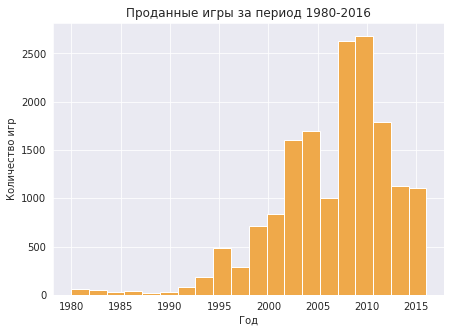

In [27]:
df['year'].hist(bins=20, color='#EFA94A', figsize=(7,5))
plt.title('Проданные игры за период 1980-2016')
plt.xlabel('Год')
plt.ylabel('Количество игр');

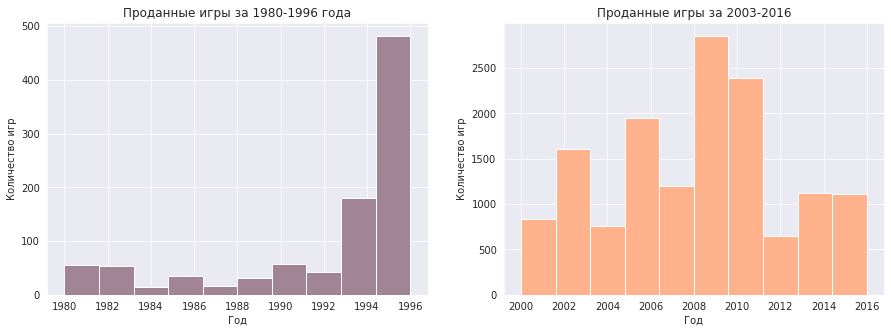

In [28]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
df['year'].hist(color='#A18594', bins=10, range=(1980,1996))
plt.title('Проданные игры за 1980-1996 года')
plt.xlabel('Год')
plt.ylabel('Количество игр')

plt.subplot(1, 2, 2)
df['year'].hist(color='#FFB28B', bins=10, range=(2000,2016))
plt.title('Проданные игры за 2003-2016')
plt.xlabel('Год')
plt.ylabel('Количество игр');

**Вывод**

До 1993 года игры особо не выпускались - мощь компьютеров тогда ещё не позволяла поставить игровую индустрию на конвеер производства. С 1994 происходит плавный подъём общих продаж, а в 2002 случается резкий скачок, который достигает своего пика в 2008 и затем идёт на спад. Одной из причин, почему рост продаж продержался так недолго - создание мобильных игр. В 2008 вышел первый айфон, для которого активно разрабатывались игры, это могло перетянуть внимание массового игрока. Также важную роль сыграл Мироковой экономический кризис 2008 года, оставивший сильный отпечаток на многих областях. Также, можем предположить что рынок пресытился обилием контента к этому моменту, который со временем стал довольно однообразным.

По итогу можно сказать, что данные до 1994-1995 годов не так сильно важны, как данные после 2002 года.

<h3>За какой характерный срок появляются новые и исчезают старые платформы?

Создадим сводную таблицу и построим график распределения продаж по платформам.

In [29]:
grouped_platforms = df.pivot_table(index='platform',
                                   values='total_sales',
                                   aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()

In [30]:
grouped_platforms.head(10)

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


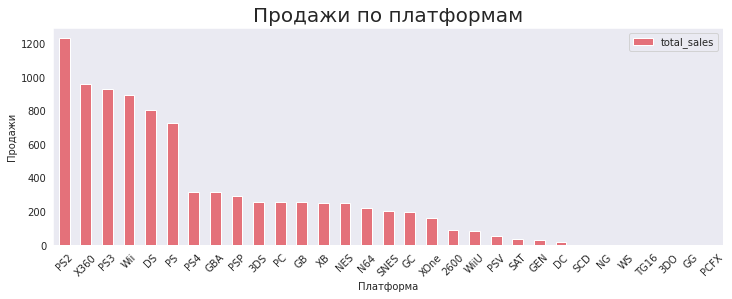

In [31]:
grouped_platforms.plot.bar(x='platform', 
                           figsize=(12,4), 
                           color='#E4717A', 
                           grid=False, rot=45)
plt.title('Продажи по платформам', fontsize=20)
plt.xlabel('Платформа')
plt.ylabel('Продажи');

Сильно выделяются первые 6 платформ, но для анализа возьмём первые 10, так как, например, PS4 только появилась на рынке и не успела набрать продаж, а для исследования может пригодиться.

Выделим топ 10 прибыльных платформ и создадим из них словарь.

In [32]:
top10_platforms = grouped_platforms.head(10).reset_index()
top10_platforms = top10_platforms['platform'].unique()

In [33]:
top10_platforms

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP',
       '3DS'], dtype=object)

Построим графики для топ 10-ти прибыльных платформ(не будем считать данные за 1994 за неактуальностью).

In [34]:
platform_leader = df.query('year > 1994 and platform in @top10_platforms')

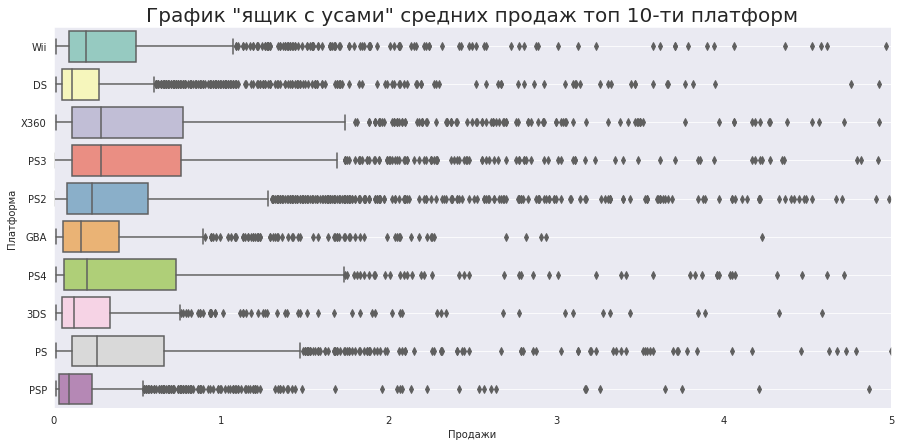

In [35]:
plt.figure(figsize=(15,7))
plt.xlim(0, 5)
plt.title('График "ящик с усами" средних продаж топ 10-ти платформ', fontsize=20)
sns.boxplot(data=platform_leader, x='total_sales', y='platform', orient='h', palette='Set3')
plt.ylabel('Платформа')
plt.grid()
plt.xlabel('Продажи');

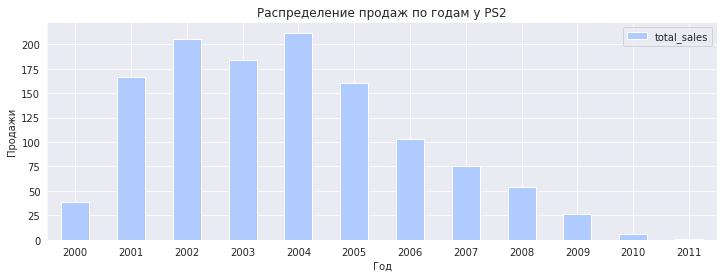

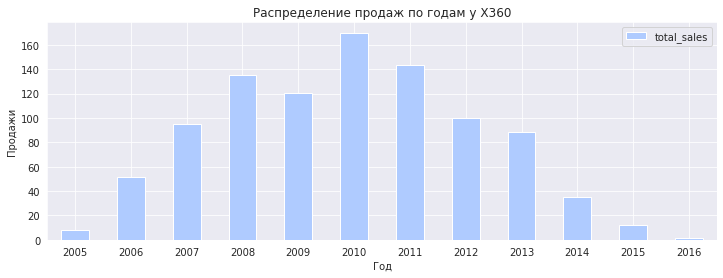

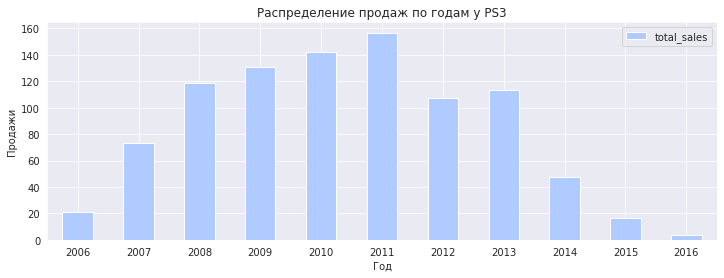

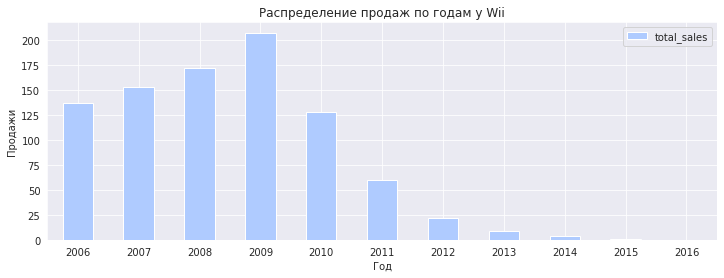

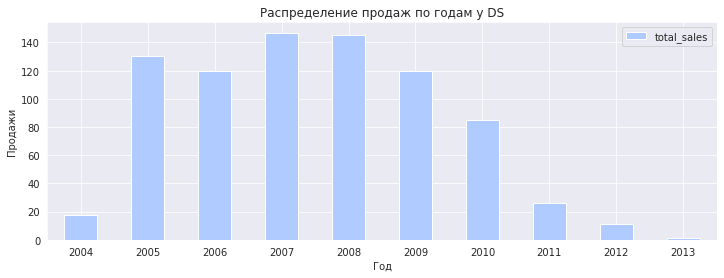

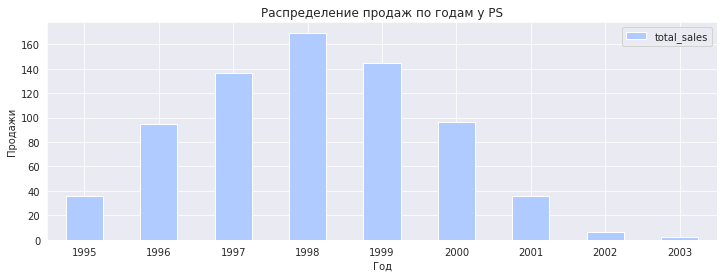

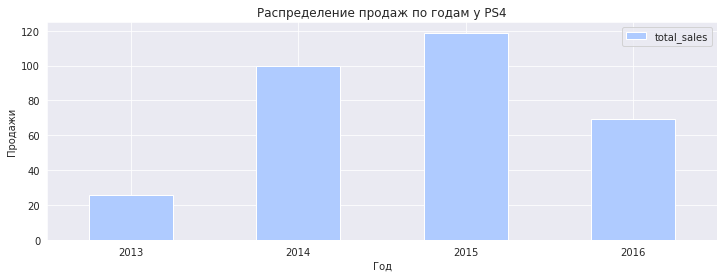

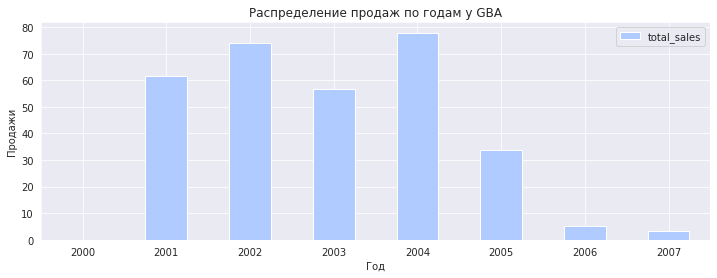

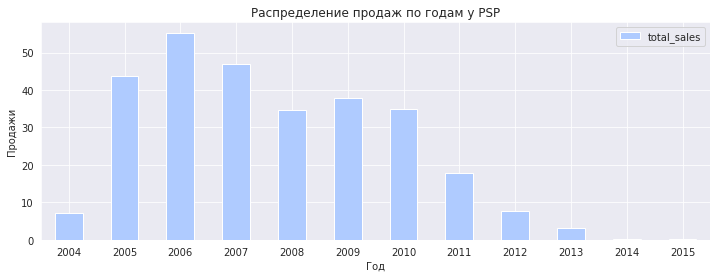

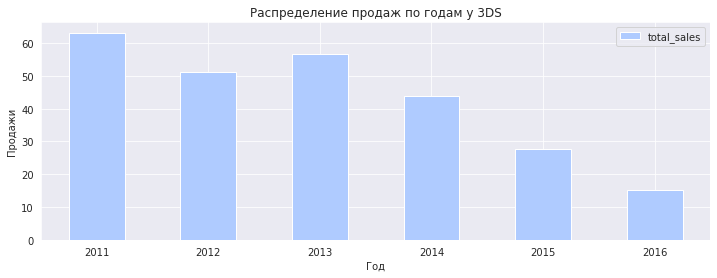

In [36]:
for platform in top10_platforms:
    platform_leader[platform_leader['platform'] == platform].pivot_table(index='year', 
                                               values='total_sales', 
                                               aggfunc='sum').plot(kind='bar', 
                                                                   figsize=(12,4), 
                                                                   color='#AFCBFF', 
                                                                   rot=0)
    plt.xlabel('Год')
    plt.ylabel('Продажи')
    plt.title(f'Распределение продаж по годам у {platform}')

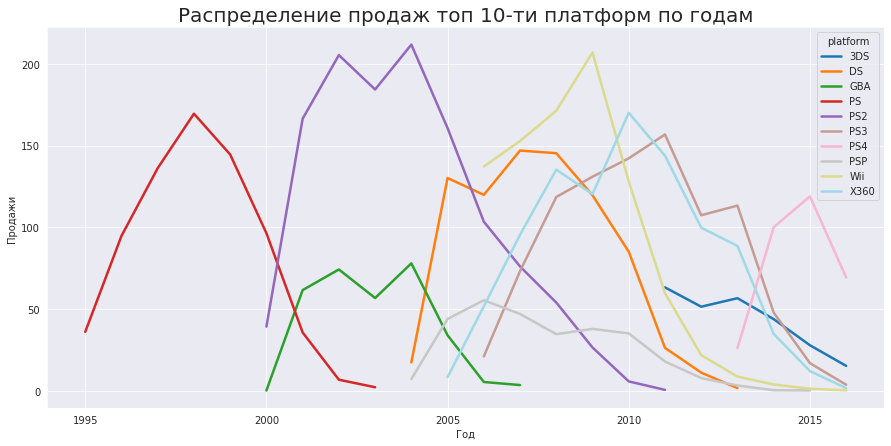

In [37]:
platform_leader.pivot_table(index='year',
                      columns = 'platform',
                      values='total_sales',
                      aggfunc='sum').plot(figsize=(15,7), 
                                          linewidth=2.5,
                                          cmap = 'tab20')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.title('Распределение продаж топ 10-ти платформ по годам', fontsize=20);

За какой характерный срок появляются новые и исчезают старые платформы? 

Рассмотрим отдельно как число будет варьироваться от выборки - сначала посчитаем среднюю жизнь всех платформ, а затем только тех, что находились в топе продаж.

In [38]:
lifetime_of_consoles = []
for name_platform in grouped_platforms['platform']:
    life_cycle = df.query('(platform == @name_platform)')\
    .pivot_table(index='year', values='total_sales', aggfunc='sum').count()
    lifetime_of_consoles.append(life_cycle)
    
mean_lifetime = int(np.mean(lifetime_of_consoles))
print(f'Средний жизненный цикл каждой платформы - {mean_lifetime} лет')

Средний жизненный цикл каждой платформы - 7 лет


In [39]:
lifetime_of_consoles = []
for name_platform in top10_platforms:
    life_cycle = df.query('(platform == @name_platform)')\
    .pivot_table(index='year', values='total_sales', aggfunc='sum').count()
    lifetime_of_consoles.append(life_cycle)
    
mean_lifetime = int(np.mean(lifetime_of_consoles))
print(f'Средний жизненный цикл одной из топ 10-ти платформ - {mean_lifetime} лет')

Средний жизненный цикл одной из топ 10-ти платформ - 9 лет


**Вывод**

Сначала мы рассмотрели распределение общих продаж по платформам и выделили 10 самых продаваемых из них. Затем построили несколько графиков, из которых можно выделить следующие моменты:

- Самые длинные "верхние усы" в "графике с усами" принадлежат X360, PS3, PS4 и PS. Это значит, что самые высокие продажи наблюдаются у этих платформ
- У всех платформ наблюдается одна тенденция - сначала увеличения, а затем снижения количества продаж с каждым годом. Например у GBA произошёл резкий спад продаж с 2004 по 2005 год - чуть больше чем в половину. Единственная выделяющаяся платформа - PC, она более-менее стабильно держится с 1995 года, не имея резких спадов. Игры на компьютере зарекомендовали себя с расцвета видеогровой индустрии, поэтому данная платформа будет ещё долго оставаться актуальной
- Некоторые платформы "затмевали" своим выходом уже существующие, и пока они были на пике, дркгие теряли в продажах. Некоторые наоборот имеют примерно одинаковое распределение - например X360 и PS3, каждая из которых появилась в 2005 году
- Пик продаж наступает примерно через 3-4 года после выхода платформы

Затем мы посчитали, за какой характерный срок появляются новые и исчезают старые платформы - отдельно для всех и топ 10 платформ. Средняя жизнь самых продающихся платформ - 11 лет, тогда как для всех платформ датасета это число составляет 7 лет.

<h3>Какие платформы лидируют по продажам, растут или падают? 

Основываясь на результатах исследования предыдущих вопросов, установим актуальный период данных - от 2012 года. Он поможет построить прогноз на 2017 год.

In [40]:
actual_df = df.query('year >= 2012')

Построим тепловую карту с помощью `sns.heatmap()` и выделим потенциально прибыльные платформы.

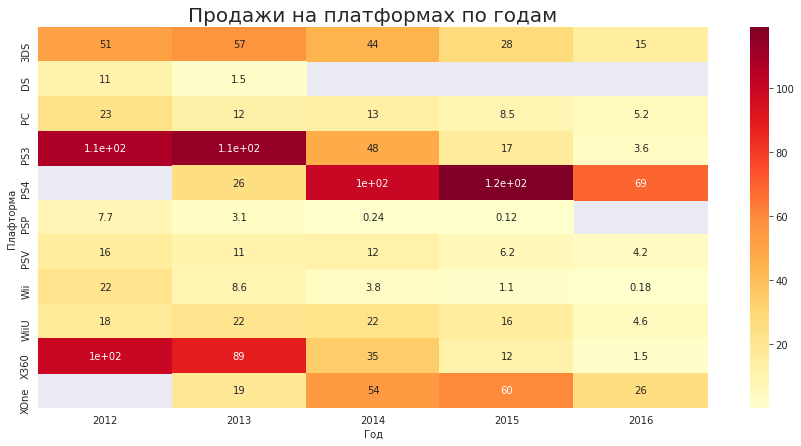

In [41]:
plt.figure(figsize=(15,7))
plt.title('Продажи на платформах по годам', fontsize=20)
sns.heatmap(actual_df.pivot_table(index='platform', columns='year', 
                                   values='total_sales', aggfunc='sum'), annot=True, cmap="YlOrRd")
plt.ylabel('Плафторма')
plt.xlabel('Год');

К 2016 году самыми потенциальными платформами можно назвать - 3DS, PC, PS4, PSV, WiiU и XOne.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

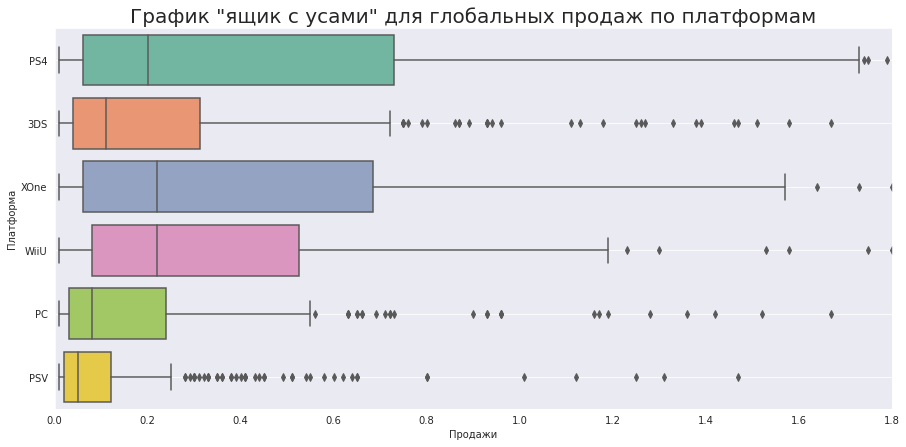

In [42]:
promising_platform = ['3DS', 'PC', 'PS4', 'PSV', 'WiiU', 'XOne']
df_promising_platform = actual_df.query('platform in @promising_platform')

plt.figure(figsize=(15,7))
plt.xlim(0, 1.8)
plt.title('График "ящик с усами" для глобальных продаж по платформам', fontsize=20)
sns.boxplot(x='total_sales', y='platform', 
            data=df_promising_platform, 
            orient='h', palette='Set2')
plt.grid()
plt.ylabel('Платформа')
plt.xlabel('Продажи');

**Вывод**

Мы построили тепловой график и по нему можно сказать, что:
- К 2016 году PS4 сильно опережает по продажам остальные платформы, хотя по сравнению с предыдщущим годом количество продаж довольно сильно просело
- Неплохо держатся XOne и 3DS. Продажи XOne даже росли до 2015 года
- Явно падают в продажах PC, PS4, PSV, WiiU, однако их всё ещё можно считать потенциальными
- Хуже всех себя показывает Wii - с 2012 года её продажи аномально сократились
- Нет ни одного случая роста продаж к 2016 году. Или в тот момент начал спадать повышенный интерес к играм, или же тенденция выпуска игр пошла на спад

Из графика "ящик с усами" можно сделать вывод, что:
- Самыми продающимися платформами являются PS4, XOne и WiiU
- Их медианные значения примерно одинаковы
- "Верхний ус" больше всего у PS4

<h3 > Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Взглянем на описательную статистику `critic_score` и `user_score` чтобы убедиться в отсутствии отрицательных или подозрительно больших значений.

In [43]:
df_promising_platform[['critic_score','user_score']].describe()

,critic_score,user_score
count,920.000000,989.000000
mean,72.645652,6.775531
std,12.255375,1.508682
min,19.000000,1.400000
25%,66.000000,6.000000
50%,74.500000,7.100000
75%,81.000000,7.900000
max,97.000000,9.300000


Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

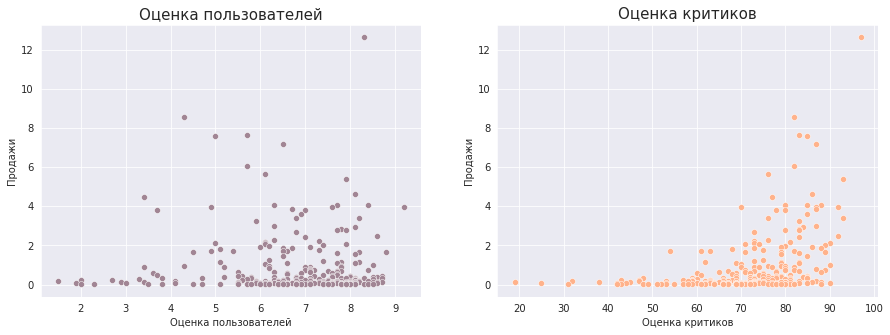

In [44]:
PS4 = df_promising_platform.query('platform == "PS4"')
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='user_score', y='total_sales',data=PS4, color='#A18594')
plt.title('Оценка пользователей', fontsize=15)
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')

plt.subplot(1, 2, 2)
sns.scatterplot(x='critic_score', y='total_sales',data=PS4, color='#FFB28B')
plt.title('Оценка критиков', fontsize=15)
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи');

In [45]:
print(f'Коэффицент корреляции для отзывов пользователей:', round(PS4['total_sales'].corr(PS4['user_score']),2))
print(f'Коэффицент корреляции для отзывов критиков:', round(PS4['total_sales'].corr(PS4['critic_score'].astype('float32')),2))

Коэффицент корреляции для отзывов пользователей: -0.03
Коэффицент корреляции для отзывов критиков: 0.41


**Вывод**

Для того, чтобы посмотреть, влияют ли на продажи внутри платформы отзывы пользователей и критиков, мы взяли на рассмотрение самую популярную платформу - PS4. 

На диаграммах рассеяния видно, что продажи не сильно зависят от оценки пользователей. Например, спросом пользовались игры, чья пользовательская оценка не достигала даже 6,5 баллов. Диаграмма для оценки критиков же выглядит более коррелирующей с продажами - чем лучше оценки, тем больше проданных копий игры. 

Посчитав коэффициент корреляции видно, что для критиков он положительный, тогда как для обычных пользователей - отрицательный. Соответственно, отзывы критиков имеют влияние на продажи.

<h3> Корреляция продаж и оценок других платформ

Посмотрим на корреляцию отзывов и продаж для всех приставок из таблицы `df_promising_platform`.

In [46]:
def platform_correlation_plt(name_of_platform):
    platform = df_promising_platform.query('(platform == @name_of_platform)')
    fig, ax = plt.subplots(1 , 2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0], color='#A18594')
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1], color='#FFB28B')
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Продажи')
    ax[1].set(ylabel='Продажи')
    plt.show()
    
    cor_with_user_score = platform['total_sales'].corr(platform['user_score'])
    critic_correl = platform['total_sales'].corr(platform['critic_score'].astype('float32'))
    data = pd.DataFrame({name_of_platform:[cor_with_user_score,critic_correl]}, index=['Пользователи','Критики'])
    print(data)

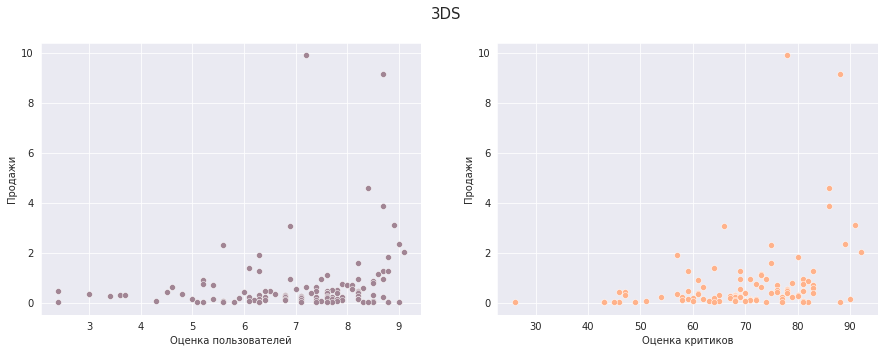

                   3DS
Пользователи  0.197583
Критики       0.320803


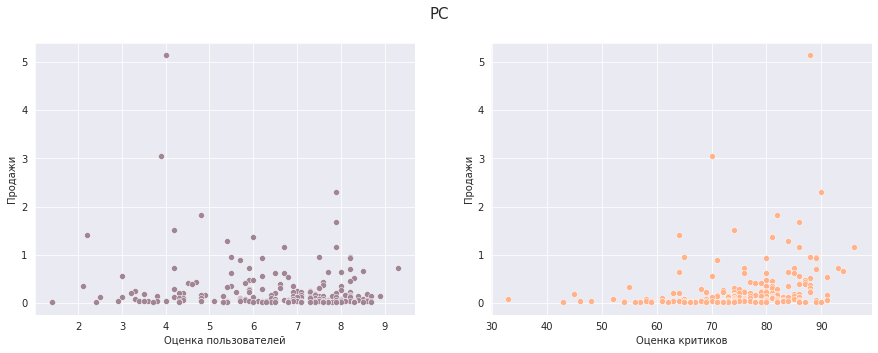

                    PC
Пользователи -0.121867
Критики       0.237243


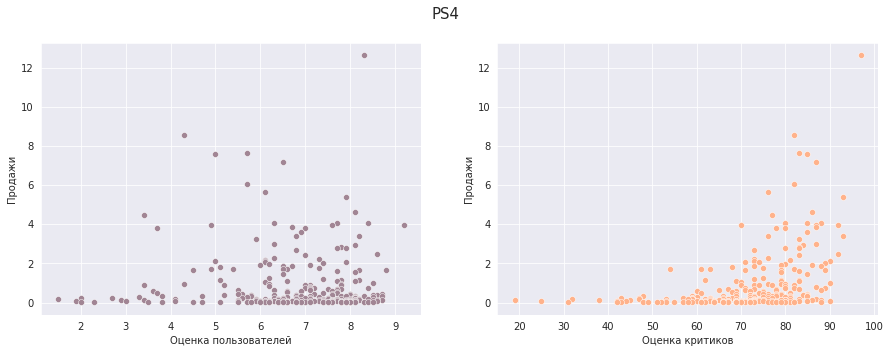

                   PS4
Пользователи -0.031957
Критики       0.406568


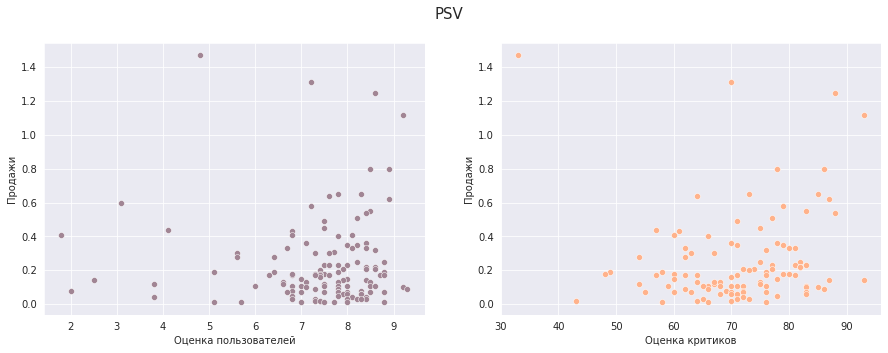

                   PSV
Пользователи -0.004339
Критики       0.094488


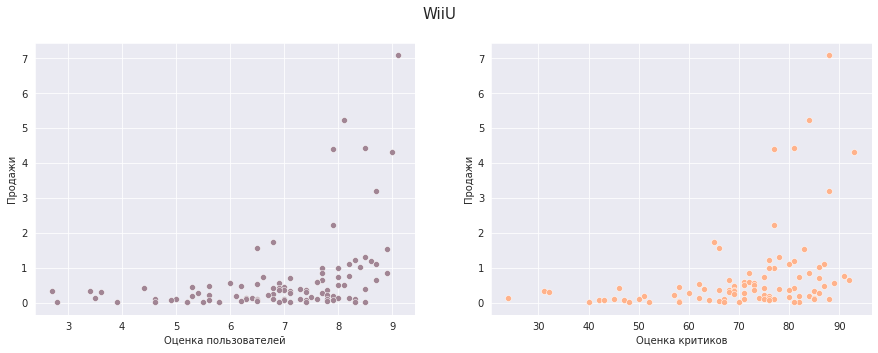

                  WiiU
Пользователи  0.400219
Критики       0.348380


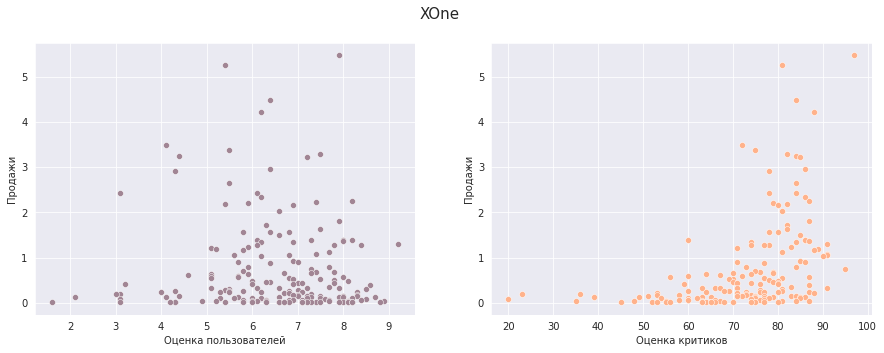

                  XOne
Пользователи -0.068925
Критики       0.416998


In [47]:
for platform in promising_platform:
    platform_correlation_plt(platform)

**Вывод**

В 4 случаях из 6 наблюдается отрицательная корреляция между продажами и пользовательскими оценками. Отзывы игроков влияют только на продажи WiiU и 3DS - это японские консоли `Nintendo`, имеющие небольшое, но очень стабильное комьюнити. Примечательно, что корреляция отзывов критиков и обычных пользователей у WiiU почти что идентичная.

В остальных случаях видно, что мнения критиков хоть и не имеют высоких показателей, но они явно выше пользовательских.

Стоит обратить на это внимание для будущих планов по развитию продаж.

<h3> Распределение игр по жанрам

Построим график и взглянем на общее распределение проданных игр по жанрам за актуальный период.

,genre,total_sales
0,Shooter,0.440000
1,Sports,0.240000
2,Platform,0.210000
3,Role-Playing,0.140000
4,Racing,0.140000
5,Fighting,0.130000
6,Action,0.120000
7,Misc,0.120000
8,Simulation,0.120000
9,Strategy,0.080000


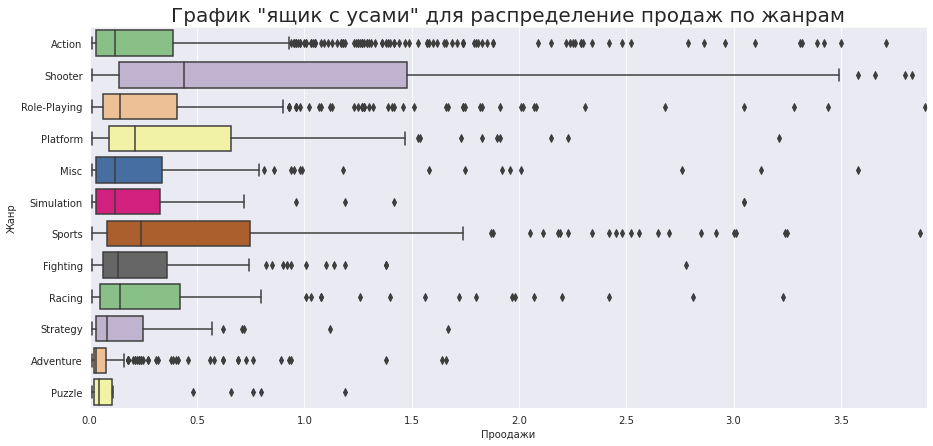

In [48]:
genre_total_sales = actual_df\
.pivot_table(index='genre', values='total_sales', aggfunc='median')\
.sort_values(by='total_sales', ascending=False).reset_index()

display(genre_total_sales.style.background_gradient('YlOrBr'))

plt.figure(figsize=(15,7))
plt.xlim(0,3.9)
plt.title('График "ящик с усами" для распределение продаж по жанрам', fontsize=20)
sns.boxplot(y='genre', x='total_sales', data=actual_df, palette='Accent', orient='h')
plt.ylabel('Жанр')
plt.xlabel('Проодажи');

**Вывод**

Мы посчитали медиану для продаж по жанрам и построили график с усами, чтобы определить наиболее прибыльный жанр.

Самые продаваемые оказались игры в жанре шутер, а самые непродаваемые - приключенческие игры. У шутеров на графике заметен самый длинный "верхний ус", у спортивного жанра, который идёт следом, он значительно меньше.

На первых 3-х местах расположились шутеры, спортивные и платформенные игры, которые хорошо продаются у массового пользователя - они легче цепляют игрока и могут надолго задержать у монитора. Платформенные игры довольно залипательны, а шутеры и спортивные игры динамичны и всегда держат в напряжении. Последние места же занимают размеренные и неторопливые жанры - пазлы и приключения, зачастую требующие времени и усидчивости.

<h3> Вывод

- Количество игр для игровых приставок берёт резкий скачок в 2002 году. До 2008 продажи активно растут, но потом случается резкий спад, причин которому может быть нессколько: мировой кризис, активное создание мобильных игр, пресыщение рынка. Так, отвечая на вопрос "Важны ли данные за все периоды?" можно ответить - нет, данные до 1994-1995 годов не так сильно важны, как, например, данные после 2002 года
- Самыми продаваемыми платформами за всё время оказались PS2, X360, PS3, Wii, DS, PS
- Средняя продолжительность жизни платформы составила 11-7 лет(в зависимости от рассматриваемой выборки)
- Пик продаж наступает примерно через 3-4 года после выхода платформы
- Лучше всего продаваемость у PS4, чуть позади идут XOne и 3DS
- Взаимосвязь между продажами и оценками критиков и пользователей видна у всех платформ, однако корреляция между продажами и оценкам критиков заметно выше. Можем сказать, что люди чаще ориентируются на мнение критиков при выборе игры. Но бывают и исключения, - у WiiU корреляция оценок пользователей и критиков почти одинакова
- Самыми популярными жанрами среди игроков являются шутер, спортивные, платформенные; самыми непопулярными жанрами оказались пазлы, приключения и стратегии. Массовый игрок скорее предпочтёт поиграть в динамичную или "залипательную" игру, чем в размеренную или заставляющую много думать

<a id='Портрет'></a>

<h2> Составьте портрет пользователя каждого региона

Определим для пользователя каждого региона (*NA, EU, JP*):

- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [49]:
def top5_platform(groupby, region, ax):
    
    pivot = actual_df.pivot_table(index=groupby, values=region, aggfunc='sum')\
    .sort_values(by=region, ascending=False)[:5]
    color = {'na': 'thistle', 'eu': 'indianred', 'jp': 'skyblue'}
    title = {'na': 'North America Sales','jp': 'Japan Sales', 'eu': 'Europe Sales'}
    plot = pivot.plot(kind='bar', title=title[region], ax=axes[ax], 
                   fontsize=18, color=color[region], rot=45)
    plot.set_xlabel('')
    plot.title.set_size(20)

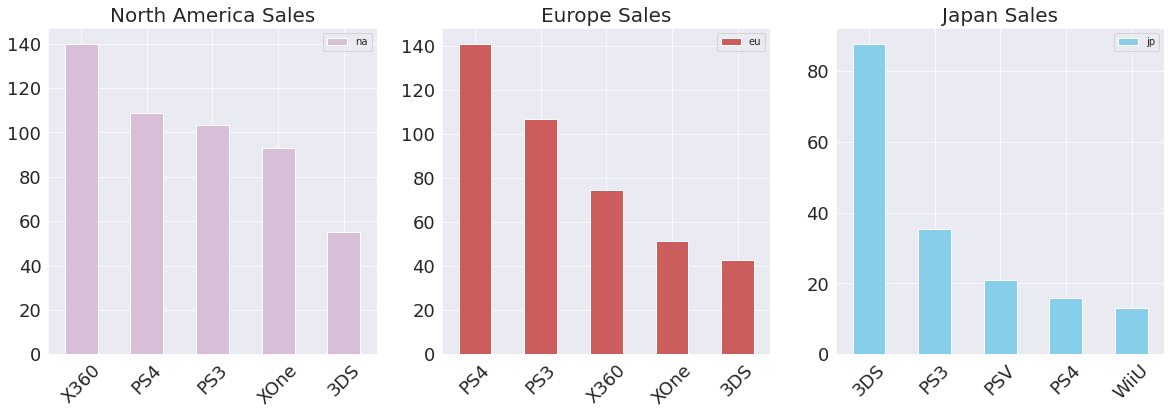

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))

top5_platform('platform', 'na', 0)
top5_platform('platform', 'eu', 1)
top5_platform('platform', 'jp', 2)

Самая популярная консоль в Северной Америке - Xbox 360, чуть менее востребованы PS4, PS3 и Xbox One, в конце топа расположилась 3DS, сильно уступая своим конкурентам. Это неудивительно, так как 3DS является японской приставкой и, хоть и пользуется популярностью, зарубежом не может достигнуть таких же высот продаж, как на родине.

Топ популярных платформ ЕС идентичен топу Северной Америки по составу, но отличается по порядку. Самой популярной консолью в ЕС является PS4, за ней идут PS3, Xbox 360. Последние два места как и в Америке - Xbox One и 3DS. Продукция Sony очевидно пользуется в ЕС большой популярностью

В отличии от ЕС и Северной Америки, распределение популярности платформ в Японии не выглядит равномерным. 3DS тут занимает почётное первое место, однако отрыв от других консолей настолько велик, что вторая по популярности плафторма - PS3 - отстаёт от неё больше, чем на половину. Это очевидно самая любимая консоль среди японского населения. Оставшиеся места в топе заняли PSV, PS4, WiiU.

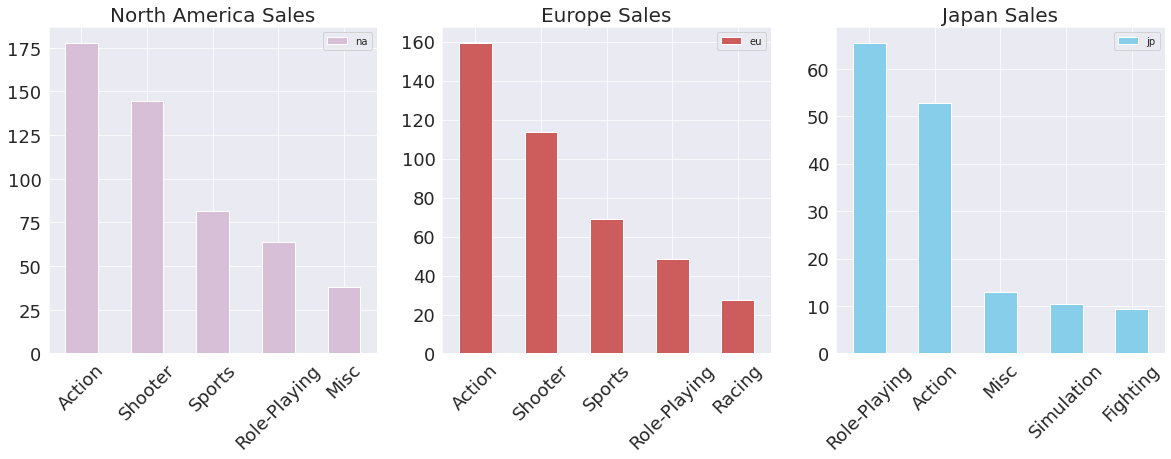

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))

top5_platform('genre', 'na', 0)
top5_platform('genre', 'eu', 1)
top5_platform('genre', 'jp', 2)

В Северной Америке самыми популярными жанрами игр оказались экшн и шутер. В конце топа оказались спортивные игры, рпг и misc(англ.«разнообразный»). Массовый игрок в Америке предпочитает яркие и динамичные игры, особенно это заметно по резкому спаду значений на спортивных играх после шутера.

Пользователи ЕС имеют почти идентичные вкусы с Северными американцами - первые 4 жанра схожи даже по порядку. Единственным отличием выступает жанр гонок, расположившийся на 5-м месте. 

Японский игрок отличается от остальных исследуемых. На первом месте по популярности оказался жанр рпг, рядом расположился экшн. Это два самых популярных жанра, потому что остальные кардинально проседают по  статистике. Массовый игрок в Японии предпочтёт отдать несколько часов на создание персонажа, чем на игры в сражения или симуляторы.

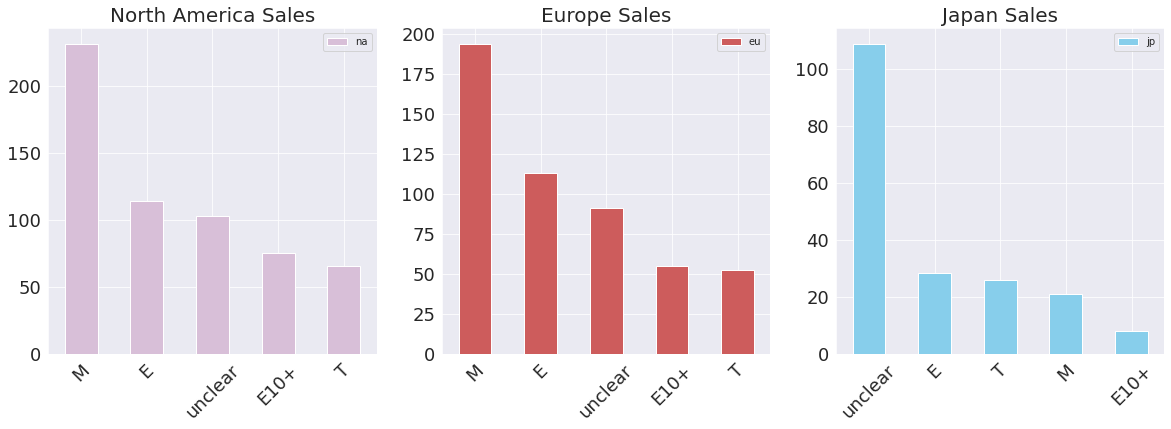

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))

top5_platform('rating', 'na', 0)
top5_platform('rating', 'eu', 1)
top5_platform('rating', 'jp', 2)

E = Everyone - «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет)

E10+ = Everyone 10+ - «Для всех от 10 лет и старше»

T = Teen - «Подросткам»: Игра подходит для лиц от 13 лет

M = Mature - «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет

unclear = наше заполнение пустых значений

Из графиков видно, что рейтинг ESRB примерно одинаково влияет на продажи в Северной Америкке и ЕС. Популярность контента для взрослых преобладает над остальными рейтингами. На втором месте игры для всех. Меньше всего прибыли принесли игры для детей от 10 лет и подростков. 

На первый взгляд в Японии подозрительно много игр без обозначенного рейтинга. Однако ESRB является Американской ассоциацией, поэтому многие игры в Японии могут попросту не проходить данную квалификацию. Если посмотреть на оставшиеся значения, то видно как примерно одинаково продаются игры для подростков и для взрослых. Меньше всего популярны игры для детей от 10 лет.

<h3> Вывод

**Вывод**

Портрет пользователя Северной Америки:

- Предпочитает играть на приставках от Microsoft и Sony (Xbox 360, PS4)
- Предпочитает экшн и шутер
- Предпочитает игры с рейтингом M (для взрослых)

Портрет пользователя ЕС:
- Предпочитает играть на приставках Sony (PS4, PS3)
- Предпочитает экшн и шутер
- Предпочитает игры с рейтингом M (для взрослых)

Портрет пользователя Японии:
- Предпочитает играть на приставке Nintendo (3DS)
- Предпочитает рпг и экшн
- Предпочитает игры с рейтингом E (для всех от 6 лет), T (для подростков) и M(для взрослых)

<a id='Гипотезы'></a>

<h2> Гипотезы

<h3>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Формулировками нулевой и альтернативной гипотез будут:

H0:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1:Средние пользовательские рейтинги платформ Xbox One и PC различаются

Пороговое значение альфа = 0.05

Проверим размер совокупностей для каждой платформы и средние значения выборок.

In [53]:
XOne = actual_df[actual_df['platform']=="XOne"]['user_score'].dropna()
PC = actual_df[actual_df['platform']=="PC"]['user_score'].dropna()
print('Размер совокупности XOne:',len(XOne), '\nРазмер совокупности PC:',len(PC))
print('Средний пользовательский рейтинг Xbox One:', XOne.mean(), 
      '\nСредний пользовательский рейтинг PC:', PC.mean())

Размер совокупности XOne: 182 
Размер совокупности PC: 206
Средний пользовательский рейтинг Xbox One: 6.521428571428572 
Средний пользовательский рейтинг PC: 6.4286407766990274


Размеры совокупностей не равны, поэтому применяя `st.ttest_ind()` укажем параметру `equal_var` значение `False`.

In [54]:
alpha = .05

results = st.ttest_ind(XOne, PC, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Данные дают недостаточное основание отвергнуть нулевую гипотезу. Соответственно, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

<h3> Средние пользовательские рейтинги жанров Action(англ. «действие», экшен-игры) и Sports(англ. «спортивные соревнования») разные

Формулировками нулевой и альтернативной гипотез будут:

H0:Средние пользовательские рейтинги жанров Action и Sports равны

H1:Средние пользовательские рейтинги жанров Action и Sports различаются

Пороговое значение альфа = 0.05

Проверим размер совокупностей для каждой платформы.

In [55]:
action = actual_df.query('genre == "Action"')['user_score'].dropna()
sports = actual_df.query('genre == "Sports"')['user_score'].dropna()
print('Размер совокупности жанра экшн:', len(action), '\nРазмер совокупности спортивного жанра:', len(sports))
print('Средний пользовательский рейтинг жанра экшн:', action.mean(), 
      '\nСредний пользовательский рейтинг спортивного жанра:', sports.mean())

Размер совокупности жанра экшн: 523 
Размер совокупности спортивного жанра: 194
Средний пользовательский рейтинг жанра экшн: 6.825047801147227 
Средний пользовательский рейтинг спортивного жанра: 5.455670103092784


Размеры совокупностей не равны, поэтому применяя `st.ttest_ind()` укажем параметру `equal_var` значение `False`.

In [56]:
alpha = .05

results = st.ttest_ind(action, sports, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 5.989458066467418e-20
Отвергаем нулевую гипотезу


Данные дают достаточное основание отвергнуть нулевую гипотезу. Соотвественно, средние пользовательские рейтинги жанров Action и Sports различаются.

<a id='Вывод'></a>

<h2> Общий вывод

<h3> Цель проекта

Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

<h3> Исходные данные

- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales —* продажи в Северной Америке (миллионы проданных копий)
- *EU_sales* — продажи в Европе (миллионы проданных копий)
- *JP_sales* — продажи в Японии (миллионы проданных копий)
- *Other_sales —* продажи в других странах (миллионы проданных копий)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации *ESRB* (англ. *Entertainment Software Rating Board).* Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<h3> Предобработка данных

**По итогам предобработки данных мы:**

- Привели названия столбцов к стилю snake_case
- Изменили тип данных столбцов year, ctitic_score и user_score
- Обработали пропущенные значения(описали возможные причины их возникновения) - удалили и заполнили их по ситуации
- Обработали дубликаты - удалили одну из дублирующихся строк
- Добавили в таблицу новый столбец `total_sales` с суммарными продажами во всех регионах

<h3> Исследования и выводы

**Для исследования мы выяснили, что:**

- Рост продажи игр пришёлся на период с 1994 по 2007 год, а пик - на 2008 год
- Самыми продаваемыми платформами за всё время оказались PS2, X360, PS3, Wii, DS, PS
- Лучше всего выделить актуальный период(после 2012 года) данных
- Самыми потенциально прибыльными платформами оказались PS4, XOne, 3DS
- Средняя продолжительность жизни платформы составила 11-7 лет(в зависимости от рассматриваемой выборки)
- Пик продаж наступает примерно через 3-4 года после выхода платформы
- Люди чаще ориентируются на мнение критиков при выборе игры
- Самыми популярные жанры - шутер, спортивные, платформенные; самые непопулярные - пазлы, приключения и стратегии

**Также мы составили портреты пользователей по регионам:**

- Северная Америки:
    - Платформа: Xbox 360, PS4
    - Жанр: экшн и шутер
    - Рейтинг: M
    
- ЕС:
    - Плафторма: PS4, PS3
    - Жанр: экшн и шутер
    - Рейтинг: M
    
- Япония:
    - Плафторма 3DS, PS3
    - Жанр: рпг и экшн
    - Рейтинг: E, T и M

**Наконец мы проверили гипотезы:**
    
`H0:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые`

`H1:Средние пользовательские рейтинги платформ Xbox One и PC различаются`
    
Не получилось отвергнуть нулевую гипотезу

`H0:Средние пользовательские рейтинги жанров Action и Sports равны`

`H1:Средние пользовательские рейтинги жанров Action и Sports различаются`
    
Отвергли нулевую гипотезу

**Чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании необходимо обратить внимание на следующие моменты:**

- Лучше всего продавать игры для приставок PS4, Xbox One и 3DS. Игры для Xbox One и PS4 стоит активнее продвигать в Северной Америке и в ЕС, тогда как игры для 3DS - в Японии
- Для кампаний в ЕС и Америке нужно выбрать игры в жанре экшн или шутер. Для продвижения игр в Японии стоит выбрать игры в жанре рпг или экшн
- Лучше обращать внимание на игры с рейтингом M и E
- Стоит продавать игры с высокими оценками от критиков
- Стоит обращать внимание на то, сколько лет игровой консоли и как долго до её ожидаемого "конца жизни"
- Продажа игр для PC будет самым безопасным вариантом из-за стабильности платформы